#                                                PROJECT-2<hr>  _APPLYING DIFFERENT TYPES OF SUPERVISED LEARNING AND COMPARING THEM BY ACCURACY_

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

 
from sklearn.model_selection import train_test_split
from sklearn import metrics

# Reading Dataset

In [2]:
#Uploading dataset
df=pd.read_csv('C:/Users/user/Desktop/test_AV3.csv')
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban,Y
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban,Y
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban,Y
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban,Y
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
362,LP002971,Male,Yes,3+,Not Graduate,Yes,4009,1777,113.0,360.0,1.0,Urban,Y
363,LP002975,Male,Yes,0,Graduate,No,4158,709,115.0,360.0,1.0,Urban,Y
364,LP002980,Male,No,0,Graduate,No,3250,1993,126.0,360.0,NaN,Semiurban,Y
365,LP002986,Male,Yes,0,Graduate,No,5000,2393,158.0,360.0,1.0,Rural,Y


In [3]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,367.000000,367.000000,362.000000,361.000000,338.000000
mean,4805.599455,1569.577657,136.132597,342.537396,0.825444
std,4910.685399,2334.232099,61.366652,65.156643,0.380150
min,0.000000,0.000000,28.000000,6.000000,0.000000
25%,2864.000000,0.000000,100.250000,360.000000,1.000000
50%,3786.000000,1025.000000,125.000000,360.000000,1.000000
75%,5060.000000,2430.500000,158.000000,360.000000,1.000000
max,72529.000000,24000.000000,550.000000,480.000000,1.000000


# Handling Missing Values 

In [4]:
#Finding is there any Missing values present in dataset
df.isnull().any()

Loan_ID              False
Gender                True
Married              False
Dependents            True
Education            False
Self_Employed         True
ApplicantIncome      False
CoapplicantIncome    False
LoanAmount            True
Loan_Amount_Term      True
Credit_History        True
Property_Area        False
Loan_Status          False
dtype: bool

In [5]:
#Filling missing values with median of that column
#median = df['LoanAmount'].median()
#df['LoanAmount'].fillna(median, inplace=False) 

In [6]:
#Filling missing values with Backward Fill

df = df.fillna(method='bfill')
df.isnull().any()

Loan_ID              False
Gender               False
Married              False
Dependents           False
Education            False
Self_Employed        False
ApplicantIncome      False
CoapplicantIncome    False
LoanAmount           False
Loan_Amount_Term     False
Credit_History       False
Property_Area        False
Loan_Status          False
dtype: bool

# Encoding Method

In [7]:
objList = df.select_dtypes(include = "object").columns
print (objList)

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'Property_Area', 'Loan_Status'],
      dtype='object')


In [8]:
#Import Label Encoder for Encoding
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

#Transforming Object datatype features into int
for feat in objList:
    df[feat] = le.fit_transform(df[feat].astype(str))

print (df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            367 non-null    int32  
 1   Gender             367 non-null    int32  
 2   Married            367 non-null    int32  
 3   Dependents         367 non-null    int32  
 4   Education          367 non-null    int32  
 5   Self_Employed      367 non-null    int32  
 6   ApplicantIncome    367 non-null    int64  
 7   CoapplicantIncome  367 non-null    int64  
 8   LoanAmount         367 non-null    float64
 9   Loan_Amount_Term   367 non-null    float64
 10  Credit_History     367 non-null    float64
 11  Property_Area      367 non-null    int32  
 12  Loan_Status        367 non-null    int32  
dtypes: float64(3), int32(8), int64(2)
memory usage: 25.9 KB
None


In [9]:
#dataset obtained after managing missing values and encoding
     #for further this modified dataset is used
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0,1,1,0,0,0,5720,0,110.0,360.0,1.0,2,1
1,1,1,1,1,0,0,3076,1500,126.0,360.0,1.0,2,1
2,2,1,1,2,0,0,5000,1800,208.0,360.0,1.0,2,1
3,3,1,1,2,0,0,2340,2546,100.0,360.0,1.0,2,1
4,4,1,0,0,1,0,3276,0,78.0,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
362,362,1,1,3,1,1,4009,1777,113.0,360.0,1.0,2,1
363,363,1,1,0,0,0,4158,709,115.0,360.0,1.0,2,1
364,364,1,0,0,0,0,3250,1993,126.0,360.0,1.0,1,1
365,365,1,1,0,0,0,5000,2393,158.0,360.0,1.0,0,1


# 1) LOGISTIC REGRESSION


In [10]:
#Import logistic regression linear model
from sklearn.linear_model import LogisticRegression
LogReg=LogisticRegression(max_iter=5000)

In [11]:
#Features values from dataset df
X=df.iloc[:,:-1]

#Target values from dataset df
Y=df.iloc[:,-1]

In [12]:
#Splitting data into train and test in ratio of 80:20
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,train_size=0.8,random_state=0)

In [13]:
#Fit the model
LogReg.fit(X_train,Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=5000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [14]:
#Predict the Y-values from test set
Y_predicted=LogReg.predict(X_test)

In [15]:
#Compute accuracy on the test set
LogReg.score(X_test,Y_test)

0.9864864864864865

# 2) DECISION TREE

In [16]:
#import tree
from sklearn import tree
Decision_tree= tree.DecisionTreeClassifier()

In [17]:
#Fit the model
Decision_tree.fit(X_train,Y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [18]:
#Compute accuracy on the test set
Decision_tree.score(X_test,Y_test)

0.972972972972973

# 3) SUPPORT VECTOR MACHINE(SVM)

In [19]:
#import SVClassifier from SVM
from sklearn.svm import SVC
SVM= SVC()

In [20]:
#Fit the model
SVM.fit(X_train, Y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [21]:
#Compute accuracy on the test set
SVM.score(X_test, Y_test)

0.8513513513513513

# 4) K NEAREST NEIGHBOUR

In [22]:
#import KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier

### Choosing appropriate value of K

In [23]:
#Setup arrays to store training and test accuracies
neighbors = np.arange(6,20)
train_accuracy =np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

for i,k in enumerate(neighbors):
    #Setup a knn classifier with k neighbors
    knn = KNeighborsClassifier(n_neighbors=k)
    
    #Fit the model
    knn.fit(X_train, Y_train)
    
    #Compute accuracy on the training set
    train_accuracy[i] = knn.score(X_train, Y_train)
    
    #Compute accuracy on the test set
    test_accuracy[i] = knn.score(X_test, Y_test) 

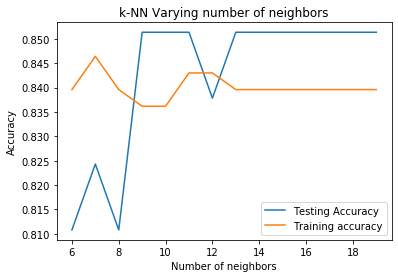

In [24]:
#Generate plot
plt.title('k-NN Varying number of neighbors')
plt.plot(neighbors, test_accuracy, label='Testing Accuracy')
plt.plot(neighbors, train_accuracy, label='Training accuracy')
plt.legend()
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.show()

Here,we can see from above plot that after around K>13 the Accuracy just tends to be constant of about 0.85.Let's retrain the model with that and check the classification report!

In [25]:
#For K=13
knn = KNeighborsClassifier(n_neighbors=13)

#Fit and Predict the Model
knn.fit(X_train,Y_train)
pred = knn.predict(X_test)

In [26]:
#Compute Accuracy
knn.score(X_test,Y_test)

0.8513513513513513

# COMPARISON DRAWN FOR DIFFERENT ALGORITHM

In [30]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import model_selection

C:\Users\user\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


LR: 0.989114 (0.013334)
KNN: 0.842342 (0.054568)
CART: 0.983634 (0.013366)


C:\Users\user\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
C:\Users\user\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
C:\Users\user\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


SVM: 0.842342 (0.054568)


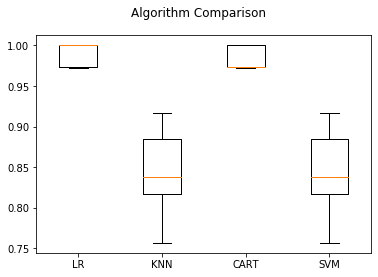

In [39]:
# prepare configuration for cross validation test harness
seed = 7
# prepare models
models = []
models.append(('LR', LogisticRegression(max_iter=1000)))
models.append(('KNN', KNeighborsClassifier(n_neighbors=13)))
models.append(('CART', DecisionTreeClassifier()))
models.append(('SVM', SVC()))
# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
for name, model in models:
	kfold = model_selection.KFold(n_splits=10, random_state=seed)
	cv_results = model_selection.cross_val_score(model, X, Y, cv=kfold, scoring=scoring)
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg)
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()